<body style="background-color:blue;">
    
 <center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>
Life Insurance Classification - Machine Learning Foundation 

<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>

<h2> Table of Contents </h2>


1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Machine Learing](#ml)
    - 5.1 [Feature Engineering](#fe)<br>
    - 5.2 [Approach 1 - Building models considering all columns](#appr1)<br>
        - 5.2.1. [Model Evaluation](#model)<br>
    - 5.3 [Approach 2 - Feature selection using co-relation with Target Variable ](#appr2)
    - 5.4 [Approach 3 - Feature selection using VIF](#appr3) 
6. [Conclusion](#conclude)





<a id=section1></a>
# 1. Introduction

In Machine Learning Foundation-1 term, following topics were covered 

1. Introduction to Machine Learning 
2. Linear Regression
3. Logistic Regression
4. Decision Tree
5. Random Forest
6. Model Evaluation Techniques 

Based on the learnings, I have worked on Insurance Risk Classification project which is multi-class classification. 



<a id=section2></a>
# 2. Problem Statement

Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but we want more. 

**The Challenge**
In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

**The result** 
People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

**Objective of this ML model**
By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.
The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process.

<a id=section3></a>
# 3. Data Loading and Description

<h4>Importing Packages</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# ------------------------------------------------------

<h4>Data Loading</h4>

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv',error_bad_lines=False )
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In this dataset, there are 127 variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an categorical measure of risk that has 8 levels.

In [3]:
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

<h4>Data Description</h4>

 
<table width="800px" align="center" cellspacing="5px"  style=" border: 1px solid black; text-align: right">
    <tr>
        <th style="text-align:center; border: 1px solid black">Variable</th>
        <th style="text-align:center; border: 1px solid black"> Description</th>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Id</td>
        <td style="text-align:left; border: 1px solid black">A unique identifier associated with an application.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Product_Info_1-7</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the product applied for</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Ins_Age</td>
        <td style="text-align:left; border: 1px solid black">Normalized age of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Ht</td>
        <td style="text-align:left; border: 1px solid black">Normalized height of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Wt</td>
        <td style="text-align:left; border: 1px solid black">Normalized weight of applicant.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">BMI</td>
        <td style="text-align:left; border: 1px solid black">Normalized BMI of applicant</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">Employment_Info_1-6</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the employment history of the applicant.</td>
    </tr>
    <tr>
        <td style="text-align:left; border: 1px solid black">InsuredInfo_1-6</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables providing information about the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Insurance_History_1-9</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the insurance history of the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Family_Hist_1-5</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the family history of the applicant.</td>
    </tr>
     <tr>
        <td style="text-align:left; border: 1px solid black">Medical_History_1-41</td>
        <td style="text-align:left; border: 1px solid black">A set of normalized variables relating to the medical history of the applicant.</td>
    </tr>
      <tr>
        <td style="text-align:left; border: 1px solid black">Medical_Keyword_1-48</td>
        <td style="text-align:left; border: 1px solid black">A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.</td>
    </tr>
      <tr>
        <td style="text-align:left; border: 1px solid black">Response</td>
        <td style="text-align:left; border: 1px solid black">This is the target variable, an ordinal variable relating to the final decision associated with an application</td>
    </tr>
    
   </table>

<a id=section4></a>
# 4. Exploratory Data Analysis

In [4]:
data.shape

(59381, 128)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [6]:
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


**The following variables are all categorical (nominal):**

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41


**The following variables are continuous:**

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

**The following variables are discrete:**

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

**Medical_Keyword_1-48 are dummy variables (already encoded)**

## Missing Value check 

In [7]:
data.iloc[:, : 50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59381 non-null  int64  
 1   Product_Info_1       59381 non-null  int64  
 2   Product_Info_2       59381 non-null  object 
 3   Product_Info_3       59381 non-null  int64  
 4   Product_Info_4       59381 non-null  float64
 5   Product_Info_5       59381 non-null  int64  
 6   Product_Info_6       59381 non-null  int64  
 7   Product_Info_7       59381 non-null  int64  
 8   Ins_Age              59381 non-null  float64
 9   Ht                   59381 non-null  float64
 10  Wt                   59381 non-null  float64
 11  BMI                  59381 non-null  float64
 12  Employment_Info_1    59362 non-null  float64
 13  Employment_Info_2    59381 non-null  int64  
 14  Employment_Info_3    59381 non-null  int64  
 15  Employment_Info_4    52602 non-null 

In [8]:
#Find out columns have missing values
data.isnull().sum()[data.isnull().sum() !=0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

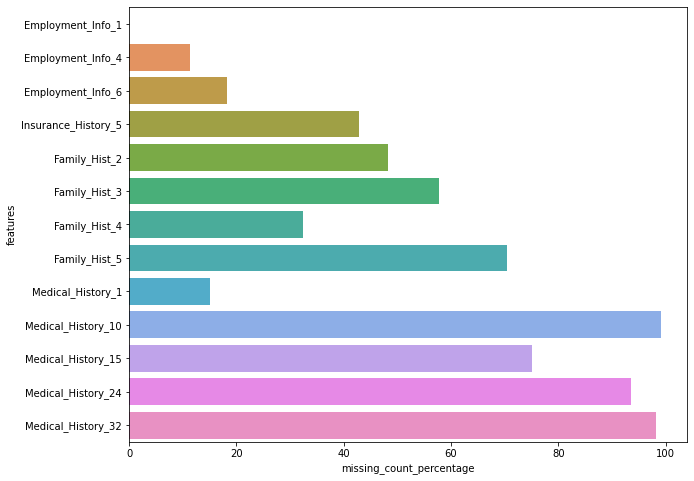

In [9]:
#Plot the missing data 
missing= data.isnull().sum()[data.isnull().sum() !=0]
missing=pd.DataFrame(missing.reset_index())
missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
missing['missing_count_percentage']=((missing['missing_count'])/59381)*100
plt.figure(figsize=(10,8))
sns.barplot(y=missing['features'],x=missing['missing_count_percentage'])



    
Missing Value Imputation for features which have less than 11000 missing values
1. Employment_Info_1     ------    missing values: 19  ------  Continuous Variable
2. Employment_Info_4   ------    missing values:6779  ------  Continuous Variable
3. Employment_Info_6 ------    missing values:10854  ------  Continuous Variable
4. Medical_History_1   ------   missing values: 8889 ------  Continuous Variable 


<b> For the remaining features, imputation might not be helpful as huge amount of data is missing, so will drop them 
    </b>

In [10]:
data[missing['features']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Employment_Info_1    59362 non-null  float64
 1   Employment_Info_4    52602 non-null  float64
 2   Employment_Info_6    48527 non-null  float64
 3   Insurance_History_5  33985 non-null  float64
 4   Family_Hist_2        30725 non-null  float64
 5   Family_Hist_3        25140 non-null  float64
 6   Family_Hist_4        40197 non-null  float64
 7   Family_Hist_5        17570 non-null  float64
 8   Medical_History_1    50492 non-null  float64
 9   Medical_History_10   557 non-null    float64
 10  Medical_History_15   14785 non-null  float64
 11  Medical_History_24   3801 non-null   float64
 12  Medical_History_32   1107 non-null   float64
dtypes: float64(13)
memory usage: 5.9 MB


<b> Imputing for Employment_info_1 </b>

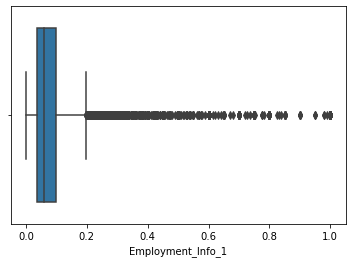

In [11]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_1'])


**Employment_Info_1 seems to have lots of outliers - Median should be right to impute missing values**

In [12]:
data['Employment_Info_1'].isna().sum()

19

In [13]:
data['Employment_Info_1'].median()

0.06

In [14]:
# Step 2: Replace using Median

data['Employment_Info_1'].fillna(data['Employment_Info_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 


In [15]:
data['Employment_Info_1'].isna().sum()

0

<b> Imputing for Employment_info_4 </b>

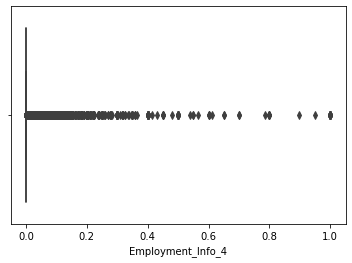

In [16]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_4'])


**Employment_Info_4 seems to have lots of outliers - Median should be right to impute missing values**

In [17]:
data['Employment_Info_4'].isna().sum()

6779

In [18]:
# Step 2: Replace using Median

data['Employment_Info_4'].fillna(data['Employment_Info_4'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 


In [19]:
data['Employment_Info_4'].isna().sum()

0

<b>Imputing for Employment_Info_6</b>

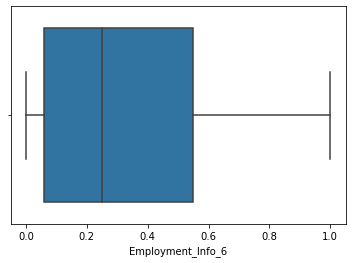

In [20]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Employment_Info_6'])

**Employment_Info_6 does not have outliers - Mean should be right to impute missing values**

In [21]:
# Step 2: Replace using Mean

data['Employment_Info_6'].fillna(data['Employment_Info_6'].mean(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 

In [22]:
data['Employment_Info_6'].isna().sum()

0

<b>Imputing for Medical_History_1</b>

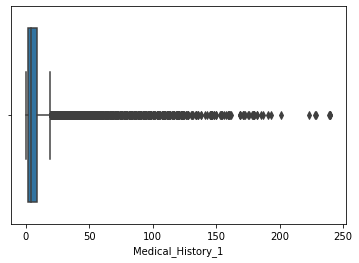

In [23]:
# Step 1: Check spread of data before imputing missing values 
plt.plot(figsize=(15,10))
sns.boxplot(data['Medical_History_1'])

**Medical_History_1 seems to have lots of outliers - Median should be right to impute missing values**

In [24]:
# Step 2: Replace using Mean

data['Medical_History_1'].fillna(data['Medical_History_1'].median(),inplace=True) 
# imputing with Meadian , as there are lots of Outliers 

<b> Dropping features with high number missing values</b>

In [25]:
# drop features with high number of missing values 
data.drop(['Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32','Family_Hist_3','Family_Hist_5','Family_Hist_2','Family_Hist_4','Insurance_History_5'],axis=1,inplace=True)

In [26]:
#Find out columns have missing values
data.isnull().sum()


Id                    0
Product_Info_1        0
Product_Info_2        0
Product_Info_3        0
Product_Info_4        0
                     ..
Medical_Keyword_45    0
Medical_Keyword_46    0
Medical_Keyword_47    0
Medical_Keyword_48    0
Response              0
Length: 119, dtype: int64

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


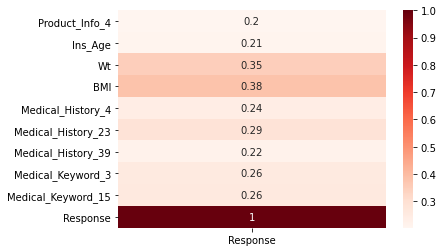

In [27]:
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
cor = data.corr()
print(type(cor))

cor_target=abs(cor['Response'])

relevant_features=cor_target[cor_target>0.2]
print(type(relevant_features))
#relevant_features.head(70)
sns.heatmap(pd.DataFrame(relevant_features), annot=True, cmap=plt.cm.Reds)
plt.show()

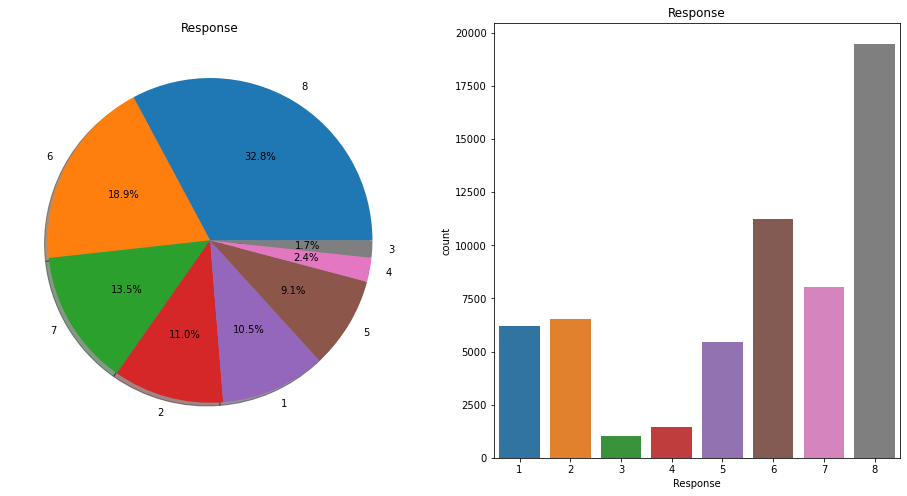

In [28]:
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=data,ax=ax[1])
ax[1].set_title('Response')
plt.show()

<a id="ml"></a>
# 5. Machine Learning

## Feature Engineering

After basic EDA, Insurance dataset has 118 features, which is not desirable for good prediction models. 

There are multiple ways which I have explored
1. Design model will all features
2. Select features which have high co-relation with target variable 'Response'
3. Use VIF - Variance Inflation factor for multi-colinearity


In [29]:
# Check for categorical columns
g = data.columns.to_series().groupby(data.dtypes).groups

g

{dtype('int64'): Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_5',
        'Product_Info_6', 'Product_Info_7', 'Employment_Info_2',
        'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
        ...
        'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
        'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
        'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
        'Response'],
       dtype='object', length=109),
 dtype('float64'): Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
        'Employment_Info_4', 'Employment_Info_6', 'Medical_History_1'],
       dtype='object'),
 dtype('O'): Index(['Product_Info_2'], dtype='object')}

There is only one column 'Product_Info_2' which is categorical

<a id="fe"></a>
##### Applying Encoding on Product_Info_2 categorical 

 Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.


In [30]:
from sklearn.preprocessing import LabelEncoder
data = pd.get_dummies(data, columns=['Product_Info_2'])
print(data)

          Id  Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0          2               1              10        0.076923               2   
1          5               1              26        0.076923               2   
2          6               1              26        0.076923               2   
3          7               1              10        0.487179               2   
4          8               1              26        0.230769               2   
...      ...             ...             ...             ...             ...   
59376  79142               1              10        0.230769               2   
59377  79143               1              26        0.230769               2   
59378  79144               1              26        0.076923               2   
59379  79145               1              10        0.230769               2   
59380  79146               1              26        0.076923               2   

       Product_Info_6  Product_Info_7  

In [31]:
#check if dataset is balance
data['Response'].value_counts().sort_values()

3     1013
4     1428
5     5432
1     6207
2     6552
7     8027
6    11233
8    19489
Name: Response, dtype: int64

<a id="appr1"></a> <font style="color:red;font-size: 25px; font-weight:bold"> 5.1  Approach 1 -  Build Models with all features </font>

In [32]:
#Preparing X  , Y 

y = data['Response'] # dependent variable
X = data.drop(['Response','Id'], axis=1) 

In [33]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 135)
Shape of y is : (59381,)


## Split Data in Train Test

In [34]:
#splitting the data into 80% train and 20% test
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X,y, test_size=0.20, random_state=25, shuffle=True)

X_train, X_test, y_train, y_test=split(X,y)

In [35]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 135)
Shape of y is : (59381,)


In [36]:
print('Shape of X_train is :', X_train.shape)
print('Shape of y_train is :',y_train.shape)
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :',y_test.shape)

Shape of X_train is : (47504, 135)
Shape of y_train is : (47504,)
Shape of X_test is : (11877, 135)
Shape of y_test is : (11877,)


In [37]:
# check if the train data covers all classes
print("y train unique values " ,  y_train.unique())
print("y test unique values " , y_test.unique())

y train unique values  [5 8 6 1 7 2 4 3]
y test unique values  [8 6 2 5 1 7 3 4]


In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV


### Model 1 - Decision Tree

In [39]:
# Using a Decision Tree classifier without any attributes
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier()
model_DT1=DT1.fit(X_train,y_train)
y_pred=model_DT1.predict(X_test)

In [40]:
dt_acc=accuracy_score(y_test,y_pred)
print("Accuracy with all default: " , dt_acc)
results = pd.DataFrame()

Accuracy with all default:  0.3976593415845752


In [41]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Method with default values'], 'Accuracy':[dt_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.397659


#### Hypertuning parameters

In [42]:
# Using a Decision Tree classifier with Random_state, Criterion , max_depth
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=10)
model_DT2=DT2.fit(X_train,y_train)
y_pred=model_DT2.predict(X_test)

dt_acc_hp1=accuracy_score(y_test,y_pred)
print("Accuracy with Entropy and max_dept=10 : " ,dt_acc_hp1)

Accuracy with Entropy and max_dept=10 :  0.5112402121747917


In [43]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with Hypertuning'], 'Accuracy':[dt_acc_hp1]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.397659
0,Decision Tree with Hypertuning,0.511240


## Model 2 - Decision Tree Classifier with GridSearchCV

In [44]:
# Using a Decision Tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
model_DT=clf_DT.fit(X_train,y_train)
y_pred=model_DT.predict(X_test)
dt_acc_grid=accuracy_score(y_test,y_pred)
print("Accuracy with GridSearchCV: " ,dt_acc_grid)

Accuracy with GridSearchCV:  0.5142712806264208


In [45]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with GridSearchCV'], 'Accuracy':[dt_acc_grid]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.397659
0,Decision Tree with Hypertuning,0.511240
0,Decision Tree with GridSearchCV,0.514271


Confusion matrix for test data with model 1 is:
 [[ 152  168    4    4  124  389  116  303]
 [  96  284    2    6  157  362  115  268]
 [  11   10    5    6   52  114    9   19]
 [   5    0    0   16    1  150    8   79]
 [  42  108    5    0  509  251   71  113]
 [  89   67    0   10   76 1167  255  591]
 [  43   18    0    4    5  362  541  639]
 [   7   13    0   13    2  309   98 3434]]


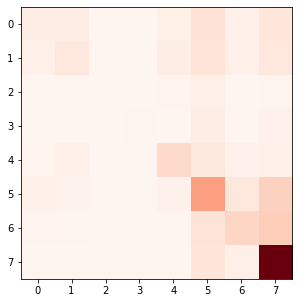

In [46]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, y_pred))

plt.figure(figsize = (10,5))
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(cnf_matrix, cmap=plt.cm.Reds, interpolation='nearest') #plot confusion matrix grid

### Model 3 - Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.35758188094636695


In [48]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(penalty="none")
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.3554769722994022


In [49]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accuracy':[logit_accuracy]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.397659
0,Decision Tree with Hypertuning,0.511240
0,Decision Tree with GridSearchCV,0.514271
0,Logistic Regression,0.355477


### Model 4 - Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [51]:
model2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=6,
                                random_state = 0,
                                max_depth=11,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )

In [52]:
model1.fit(X_train,y_train)
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [53]:
model2.fit(X_train,y_train)
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.5308579607645029
Accuracy score for test data with model 2 is: 0.3771996295360781


Confusion matrix for test data with model 1 is:
 [[ 245  197    0    4  108  304  111  291]
 [ 135  333    0    2  152  320   94  254]
 [  14   16    7    2   61   87   11   28]
 [   6    0    0   14    0  116   20  103]
 [  47  106    2    0  563  224   54  103]
 [ 105   93    0    6  103 1156  220  572]
 [  34   17    0    3   17  386  535  620]
 [  18    9    0    2    2  274  119 3452]]
Confusion matrix for test data with model 2 is:
 [[   1   42    0    0   54  332    1  830]
 [   1   56    0    0   59  371    1  802]
 [   0    2    0    0   10   45    0  169]
 [   0    0    0    0    0   17    0  242]
 [   2   26    0    0  106  239    0  726]
 [   0   21    0    0    0  515    1 1718]
 [   0    6    0    0    0  262    0 1344]
 [   0    0    0    0    0   74    0 3802]]


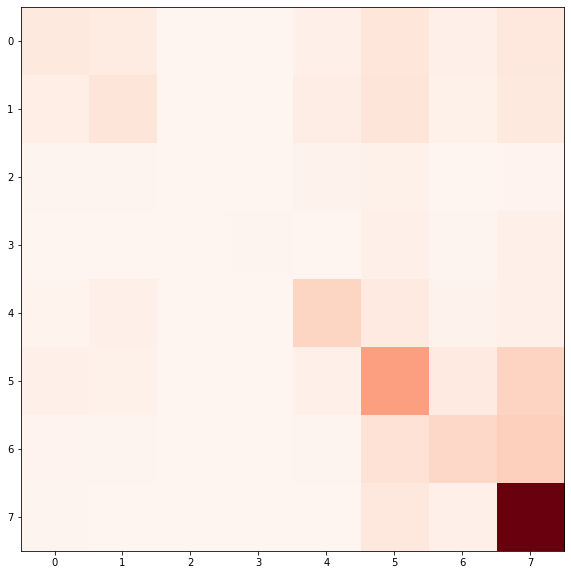

In [55]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))
plt.figure(figsize = (20,10))
cnf_matrix = confusion_matrix(y_test, prediction1)
plt.imshow(cnf_matrix, cmap=plt.cm.Reds, interpolation='nearest') #plot confusion matrix grid

In [56]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1,average='micro'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average='micro'))

F1_score for test data using model1 is: 0.5308579607645029
F1_score for test data using model2 is: 0.3771996295360781


In [57]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1,average='micro')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2,average='micro')
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.5308579607645029
Precision score for test data using model2 is: 0.3771996295360781


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           1       0.41      0.19      0.26      1260
           2       0.43      0.26      0.32      1290
           3       0.78      0.03      0.06       226
           4       0.42      0.05      0.10       259
           5       0.56      0.51      0.53      1099
           6       0.40      0.51      0.45      2255
           7       0.46      0.33      0.39      1612
           8       0.64      0.89      0.74      3876

    accuracy                           0.53     11877
   macro avg       0.51      0.35      0.36     11877
weighted avg       0.51      0.53      0.50     11877



In [59]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier'], 'Accuracy':accuracy_score(y_test, prediction1)})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.397659
0,Decision Tree with Hypertuning,0.511240
0,Decision Tree with GridSearchCV,0.514271
0,Logistic Regression,0.355477
0,Random Forest Classifier,0.530858


### End of Model development based on Approach 1


<a id="appr2"></a> 

<font style="color:red;font-size: 25px; font-weight:bold">  Approach 2 -  Feature selection based on co-relation with Target Variable </font>

In [60]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
cor_target=abs(cor['Response'])

relevant_features=cor_target[cor_target>0.2]
relevant_features

Product_Info_4        0.202434
Ins_Age               0.209610
Wt                    0.351395
BMI                   0.381601
Medical_History_4     0.239896
Medical_History_23    0.286584
Medical_History_39    0.220176
Medical_Keyword_3     0.257706
Medical_Keyword_15    0.259169
Response              1.000000
Name: Response, dtype: float64

<Figure size 864x720 with 0 Axes>

In [61]:
# based on output of Pearson Correlation - select only columns with cor >0.2

cols=['Product_Info_4','Ins_Age','Wt','BMI','Medical_History_4','Medical_History_23','Medical_History_39','Medical_Keyword_3','Medical_Keyword_15']
X=data[cols]
y=data['Response']

In [62]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 9)
Shape of y is : (59381,)


## Split Data in Train Test

In [63]:
#splitting the data into 80% train and 20% test


X_train, X_test, y_train, y_test=split(X,y)

In [64]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 9)
Shape of y is : (59381,)


In [65]:
print('Shape of X_train is :', X_train.shape)
print('Shape of y_train is :',y_train.shape)
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :',y_test.shape)

Shape of X_train is : (47504, 9)
Shape of y_train is : (47504,)
Shape of X_test is : (11877, 9)
Shape of y_test is : (11877,)


In [66]:
# check if the train data covers all classes
print("y train unique values " ,  y_train.unique())
print("y test unique values " , y_test.unique())

y train unique values  [5 8 6 1 7 2 4 3]
y test unique values  [8 6 2 5 1 7 3 4]


In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV


### Model 1 - Decision Tree

In [68]:
# Using a Decision Tree classifier without any attributes
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier()
model_DT1=DT1.fit(X_train,y_train)
y_pred=model_DT1.predict(X_test)

In [69]:
dt_acc=accuracy_score(y_test,y_pred)
print("Accuracy with all default: " , dt_acc)
results_approach2 = pd.DataFrame()

Accuracy with all default:  0.3666750863012545


In [70]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Method with default values'], 'Accuracy':[dt_acc]})
results_approach2 = pd.concat( [results_approach2, tempResults] )
results_approach2 = results_approach2[['Algorithm','Accuracy']]
results_approach2

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.366675


#### Hypertuning parameters

In [71]:
# Using a Decision Tree classifier with Random_state, Criterion , max_depth
#from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=10)
model_DT2=DT2.fit(X_train,y_train)
y_pred=model_DT2.predict(X_test)

dt_acc_hp1=accuracy_score(y_test,y_pred)
print("Accuracy with Entropy and max_dept=10 : " ,dt_acc_hp1)

Accuracy with Entropy and max_dept=10 :  0.5058516460385619


In [72]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with Hypertuning'], 'Accuracy':[dt_acc_hp1]})
results_approach2 = pd.concat( [results_approach2, tempResults] )
results_approach2 = results_approach2[['Algorithm','Accuracy']]
results_approach2

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.366675
0,Decision Tree with Hypertuning,0.505852


## Model 2 - Decision Tree Classifier with GridSearchCV

In [73]:
# Using a Decision Tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
model_DT=clf_DT.fit(X_train,y_train)
y_pred=model_DT.predict(X_test)
dt_acc_grid=accuracy_score(y_test,y_pred)
print("Accuracy with GridSearchCV: " ,dt_acc_grid)

Accuracy with GridSearchCV:  0.5073671802643765


In [74]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with GridSearchCV'], 'Accuracy':[dt_acc_grid]})
results_approach2 = pd.concat( [results_approach2, tempResults] )
results_approach2 = results_approach2[['Algorithm','Accuracy']]
results_approach2

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.366675
0,Decision Tree with Hypertuning,0.505852
0,Decision Tree with GridSearchCV,0.507367


### Model 3 - Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.4517133956386293


In [76]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(penalty="none")
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.45524964216553


In [77]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accuracy':[logit_accuracy]})
results_approach2 = pd.concat( [results_approach2, tempResults] )
results_approach2 = results_approach2[['Algorithm','Accuracy']]
results_approach2

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.366675
0,Decision Tree with Hypertuning,0.505852
0,Decision Tree with GridSearchCV,0.507367
0,Logistic Regression,0.455250


#### Model 4 - Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [79]:
model2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=6,
                                random_state = 0,
                                max_depth=7,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )

In [80]:
model1.fit(X_train,y_train)
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [81]:
model2.fit(X_train,y_train)
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.4656057927085964
Accuracy score for test data with model 2 is: 0.4411046560579271


In [83]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier'], 'Accuracy':accuracy_score(y_test, prediction1)})
results_approach2 = pd.concat( [results_approach2, tempResults] )
results_approach2 = results_approach2[['Algorithm','Accuracy']]
results_approach2

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.366675
0,Decision Tree with Hypertuning,0.505852
0,Decision Tree with GridSearchCV,0.507367
0,Logistic Regression,0.455250
0,Random Forest Classifier,0.465606


<a id="model"></a> **Model Evaluation for Random Forest model** <br>Hence, will be using accuracy score for the model performance evaluation. However, applying f1 score, precision, classification report for learning purpose


In [84]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 1 is:
 [[ 181  199   18   15  139  268  152  288]
 [ 158  327   11   13  164  246  129  242]
 [  20   32   24    7   39   69   10   25]
 [  16   18    3   26    6   96   18   76]
 [  74  124   20    4  508  203   69   97]
 [ 186  144   18   48  140  858  306  555]
 [  82   70    4   12   35  336  535  538]
 [  91   87    6   42   17  308  254 3071]]
Confusion matrix for test data with model 2 is:
 [[   0    1    0    0   74  613  107  465]
 [   0    1    0    0   78  716   82  413]
 [   0    0    0    0   20  132    3   71]
 [   0    0    0    0    0   87    0  172]
 [   0    2    0    0  199  662   33  203]
 [   0    0    0    0    0 1131  108 1016]
 [   0    0    0    0    0  563  245  804]
 [   0    0    0    0    0  182   31 3663]]


In [85]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1,average='micro'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average='micro'))

F1_score for test data using model1 is: 0.4656057927085964
F1_score for test data using model2 is: 0.4411046560579271


In [86]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1,average='micro')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2,average='micro')
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.4656057927085964
Precision score for test data using model2 is: 0.4411046560579271


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1260
           2       0.25      0.00      0.00      1290
           3       0.00      0.00      0.00       226
           4       0.00      0.00      0.00       259
           5       0.54      0.18      0.27      1099
           6       0.28      0.50      0.36      2255
           7       0.40      0.15      0.22      1612
           8       0.54      0.95      0.69      3876

    accuracy                           0.44     11877
   macro avg       0.25      0.22      0.19     11877
weighted avg       0.36      0.44      0.35     11877



### End of Model development based on Approach 2



In [88]:
# Lets check for Multicolinearity

corr = data.corr()
corr

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
Id,1.000000,-0.002870,-0.001869,-0.002914,-0.004195,0.005038,0.002117,0.001764,0.003674,0.005648,...,0.000164,-0.001426,0.000232,-0.009268,-0.004578,-0.007424,0.001273,0.001423,0.007017,-0.006821
Product_Info_1,-0.002870,1.000000,0.027573,0.059829,0.069720,-0.078684,0.012169,-0.077429,0.052720,-0.004035,...,0.010369,-0.002299,-0.000440,-0.004500,0.005599,0.004116,-0.013213,0.009723,0.023441,0.000630
Product_Info_3,-0.001869,0.027573,1.000000,0.048775,0.025419,-0.018855,0.015581,0.001005,0.293546,0.213546,...,-0.002935,0.000794,-0.003042,-0.006732,-0.003999,0.039758,0.013393,0.005024,-0.018616,-0.005602
Product_Info_4,-0.002914,0.059829,0.048775,1.000000,0.040433,-0.089075,0.051542,-0.261356,0.141780,-0.028041,...,0.041128,0.002465,-0.000510,0.001497,0.019834,-0.004137,-0.031168,0.101744,0.241710,-0.081287
Product_Info_5,-0.004195,0.069720,0.025419,0.040433,1.000000,-0.045840,0.019435,0.006543,0.054495,0.022393,...,-0.004173,0.005916,-0.000441,-0.000363,-0.001749,0.023549,0.007430,0.003977,-0.000104,-0.005312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Product_Info_2_D1,-0.007424,0.004116,0.039758,-0.004137,0.023549,-0.018671,0.016265,0.214311,0.088208,0.090272,...,-0.048881,-0.024461,-0.018308,-0.025350,-0.021430,1.000000,-0.121195,-0.198571,-0.166188,-0.076082
Product_Info_2_D2,0.001273,-0.013213,0.013393,-0.031168,0.007430,-0.009350,0.010882,0.214696,0.059978,0.074766,...,-0.047750,-0.023895,-0.017885,-0.024764,-0.020934,-0.121195,1.000000,-0.193978,-0.162343,-0.074322
Product_Info_2_D3,0.001423,0.009723,0.005024,0.101744,0.003977,0.012803,0.019936,-0.006591,0.082990,0.084567,...,-0.078236,-0.039150,-0.029303,-0.040574,-0.034300,-0.198571,-0.193978,1.000000,-0.265990,-0.121772
Product_Info_2_D4,0.007017,0.023441,-0.018616,0.241710,-0.000104,0.002187,0.013719,-0.333044,0.007460,-0.062270,...,-0.065477,-0.032766,-0.024524,-0.033957,-0.028706,-0.166188,-0.162343,-0.265990,1.000000,-0.101913


<a id="appr3"></a> 

<font style="color:red;font-size: 25px; font-weight:bold">  Approach 3 -  Feature selection using Variance Inflation Factor (VIF) </font>

### Variance Inflation Factor (VIF)

In [89]:
# 2. Variance Inflation Factor (VIF)
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# data = pd.read_csv('dara.csv', index_col=0)

y = data['Response'] # dependent variable
X = data.drop(['Response','Id'], axis=1)

In [90]:
X.values
X.shape
len(X.columns)

135

In [91]:
#X=data[['Medical_Keyword_48','Medical_Keyword_47','Medical_Keyword_45']]

In [92]:
X.shape

(59381, 135)

In [93]:
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(10)]

#vif["features"] = X.columns

#vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#for i in range(10)]

#vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data['feature'] = X.columns 
#vif_data['VIF']=1.1
#vif_data['VIF'].dtype
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor((X.values), i) for i in range(X.shape[1])] 


In [94]:
vif_data=vif_data[vif_data.VIF<5]

In [95]:
print(vif_data.head(10))

              feature       VIF
0      Product_Info_1  1.031437
1      Product_Info_3  2.642384
2      Product_Info_4  1.564452
3      Product_Info_5  1.016014
4      Product_Info_6  1.055939
5      Product_Info_7  1.016435
6             Ins_Age  2.410671
10  Employment_Info_1  1.424037
11  Employment_Info_2  2.394211
12  Employment_Info_3  2.678575


In [96]:
vif_data['feature'].values

array(['Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age',
       'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4',
       'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_2', 'Family_Hist_1', 'Medical_History_1',
       'Medical_History_2', 'Medical_History_3', 'Medical_History_4',
       'Medical_History_5', 'Medical_History_7', 'Medical_History_8',
       'Medical_History_9', 'Medical_History_11', 'Medical_History_12',
       'Medical_History_14', 'Medical_History_16', 'Medical_History_17',
       'Medical_History_18', 'Medical_History_19', 'Medical_History_20',
       'Medical_History_21', 'Medical_History_22', 'Medical_History_27',
       'Medical_History_28', 'Medical_History_29', 'Medical_History_30',
       'Medical_Histor

In [97]:
X=X[list(vif_data['feature'].values)]


In [98]:
X.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_4', 'Product_Info_5',
       'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Employment_Info_1',
       'Employment_Info_2', 'Employment_Info_3', 'Employment_Info_4',
       'Employment_Info_5', 'Employment_Info_6', 'InsuredInfo_1',
       'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5',
       'InsuredInfo_6', 'InsuredInfo_7', 'Insurance_History_2',
       'Family_Hist_1', 'Medical_History_1', 'Medical_History_2',
       'Medical_History_3', 'Medical_History_4', 'Medical_History_5',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_11', 'Medical_History_12', 'Medical_History_14',
       'Medical_History_16', 'Medical_History_17', 'Medical_History_18',
       'Medical_History_19', 'Medical_History_20', 'Medical_History_21',
       'Medical_History_22', 'Medical_History_27', 'Medical_History_28',
       'Medical_History_29', 'Medical_History_30', 'Medical_History_31',


In [99]:
y=data['Response']

In [100]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 95)
Shape of y is : (59381,)


## Split Data in Train Test

In [101]:
#splitting the data into 80% train and 20% test


X_train, X_test, y_train, y_test=split(X,y)

In [102]:
print('Shape of X is :', X.shape)
print('Shape of y is :',y.shape)

Shape of X is : (59381, 95)
Shape of y is : (59381,)


In [103]:
print('Shape of X_train is :', X_train.shape)
print('Shape of y_train is :',y_train.shape)
print('Shape of X_test is :', X_test.shape)
print('Shape of y_test is :',y_test.shape)

Shape of X_train is : (47504, 95)
Shape of y_train is : (47504,)
Shape of X_test is : (11877, 95)
Shape of y_test is : (11877,)


In [104]:
# check if the train data covers all classes
print("y train unique values " ,  y_train.unique())
print("y test unique values " , y_test.unique())

y train unique values  [5 8 6 1 7 2 4 3]
y test unique values  [8 6 2 5 1 7 3 4]


In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV


### Model 1 - Decision Tree

In [106]:
# Using a Decision Tree classifier without any attributes
from sklearn.tree import DecisionTreeClassifier
DT1=DecisionTreeClassifier()
model_DT1=DT1.fit(X_train,y_train)
y_pred=model_DT1.predict(X_test)

In [107]:
dt_acc=accuracy_score(y_test,y_pred)
print("Accuracy with all default: " , dt_acc)
results_approach3 = pd.DataFrame()

Accuracy with all default:  0.3035278268923129


In [108]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Method with default values'], 'Accuracy':[dt_acc]})
results_approach3 = pd.concat( [results_approach3, tempResults] )
results_approach3 = results_approach3[['Algorithm','Accuracy']]
results_approach3

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.303528


#### Hypertuning parameters

In [109]:
# Using a Decision Tree classifier with Random_state, Criterion , max_depth
from sklearn.tree import DecisionTreeClassifier
DT2=DecisionTreeClassifier(random_state = 0, criterion='entropy', max_depth=10)
model_DT2=DT2.fit(X_train,y_train)
y_pred=model_DT2.predict(X_test)

dt_acc_hp1=accuracy_score(y_test,y_pred)
print("Accuracy with Entropy and max_dept=10 : " ,dt_acc_hp1)

Accuracy with Entropy and max_dept=10 :  0.4198029805506441


In [110]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with Hypertuning'], 'Accuracy':[dt_acc_hp1]})
results_approach3 = pd.concat( [results_approach3, tempResults] )
results_approach3 = results_approach3[['Algorithm','Accuracy']]
results_approach3

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.303528
0,Decision Tree with Hypertuning,0.419803


## Model 2 - Decision Tree Classifier with GridSearchCV

In [111]:
# Using a Decision Tree classifier with GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':range(1,20,2)}
DT=DecisionTreeClassifier()
clf_DT=GridSearchCV(DT,param_grid,cv=10,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)
model_DT=clf_DT.fit(X_train,y_train)
y_pred=model_DT.predict(X_test)
dt_acc_grid=accuracy_score(y_test,y_pred)
print("Accuracy with GridSearchCV: " ,dt_acc_grid)

Accuracy with GridSearchCV:  0.42258145996463753


In [112]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree with GridSearchCV'], 'Accuracy':[dt_acc_grid]})
results_approach3 = pd.concat( [results_approach3, tempResults] )
results_approach3 = results_approach3[['Algorithm','Accuracy']]
results_approach3

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.303528
0,Decision Tree with Hypertuning,0.419803
0,Decision Tree with GridSearchCV,0.422581


### Model 3 - Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.3338385114086049


In [114]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(penalty="none")
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 0.3386377031236844


In [115]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'], 'Accuracy':[logit_accuracy]})
results_approach3 = pd.concat( [results_approach3, tempResults] )
results_approach3 = results_approach3[['Algorithm','Accuracy']]
results_approach3

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.303528
0,Decision Tree with Hypertuning,0.419803
0,Decision Tree with GridSearchCV,0.422581
0,Logistic Regression,0.338638


### Model 3 - Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [117]:
model2 = RandomForestClassifier(criterion='entropy',
                                n_estimators=6,
                                random_state = 0,
                                max_depth=3,
                                min_samples_split=5,
                                min_samples_leaf=4,
                                max_leaf_nodes=5,
                                n_jobs=-1,
                                )

In [118]:
model1.fit(X_train,y_train)
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [119]:
model2.fit(X_train,y_train)
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.4395049254862339
Accuracy score for test data with model 2 is: 0.35455081249473774


In [121]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier'], 'Accuracy':accuracy_score(y_test, prediction1)})
results_approach3 = pd.concat( [results_approach3, tempResults] )
results_approach3 = results_approach3[['Algorithm','Accuracy']]
results_approach3

,Algorithm,Accuracy
0,Decision Tree Method with default values,0.303528
0,Decision Tree with Hypertuning,0.419803
0,Decision Tree with GridSearchCV,0.422581
0,Logistic Regression,0.338638
0,Random Forest Classifier,0.439505


In [122]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 1 is:
 [[ 322  158    3    4   58  315   62  338]
 [ 162  206    1   10   64  334   75  438]
 [  16   11   11    8   23  110    2   45]
 [  10    4    4   18    3  137    5   78]
 [  58   68    8    4  233  237   47  444]
 [ 130  102    1    7    3 1056  128  828]
 [  57   22    1    6    1  310  183 1032]
 [  48   33    1    3    6  430  164 3191]]
Confusion matrix for test data with model 2 is:
 [[  13    5    0    0   41  185    0 1016]
 [   6   13    0    0   41  189    0 1041]
 [   0    1    0    0   10   44    0  171]
 [   0    0    0    0    0   47    0  212]
 [   2    4    0    0   83  121    0  889]
 [   5    0    0    0    0  319    0 1931]
 [   0    0    0    0    0  116    0 1496]
 [   0    0    0    0    0   93    0 3783]]


In [123]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1,average='micro'))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2, average='micro'))

F1_score for test data using model1 is: 0.4395049254862339
F1_score for test data using model2 is: 0.35455081249473774


In [124]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1,average='micro')
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2,average='micro')
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.4395049254862339
Precision score for test data using model2 is: 0.35455081249473774


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           1       0.50      0.01      0.02      1260
           2       0.57      0.01      0.02      1290
           3       0.00      0.00      0.00       226
           4       0.00      0.00      0.00       259
           5       0.47      0.08      0.13      1099
           6       0.29      0.14      0.19      2255
           7       0.00      0.00      0.00      1612
           8       0.36      0.98      0.52      3876

    accuracy                           0.35     11877
   macro avg       0.27      0.15      0.11     11877
weighted avg       0.33      0.35      0.22     11877



### End of Model development based on Approach 3

## Summarizing Accuracy scores for all 3 Approaches and various models for each of the approach

In [126]:
print("Approach 1 - Considering all the given features \n")
print(results,"\n\n\n") 

print("Approach 2 - Features selection based on high co-relation with Target variables \n")
print(results_approach2,"\n\n\n")

print("Approach 3 - Features selection based on VIF \n")
print(results_approach3,"\n\n\n")

Approach 1 - Considering all the given features 

                                  Algorithm  Accuracy
0  Decision Tree Method with default values  0.397659
0            Decision Tree with Hypertuning  0.511240
0           Decision Tree with GridSearchCV  0.514271
0                       Logistic Regression  0.355477
0                  Random Forest Classifier  0.530858 



Approach 2 - Features selection based on high co-relation with Target variables 

                                  Algorithm  Accuracy
0  Decision Tree Method with default values  0.366675
0            Decision Tree with Hypertuning  0.505852
0           Decision Tree with GridSearchCV  0.507367
0                       Logistic Regression  0.455250
0                  Random Forest Classifier  0.465606 



Approach 3 - Features selection based on VIF 

                                  Algorithm  Accuracy
0  Decision Tree Method with default values  0.303528
0            Decision Tree with Hypertuning  0.419803
0  

### Business Interpretion and Conclusion
<a id="conclude"></a> 

All 3 approoaches and various ML algorithm for each approach did not result in the best of the ML model with with high evaluation scores possibly due to lack of important information 

It can be concluded that basic feature engineering and basic ML model will not help with accurate risk classifiation. 

<br> <b>Hence, next Steps that should be</b><br>
1. Apply more advance techniques for Feature Engineering
2. Build models using Advance Machine learning algorithms
3. Adding more data samples or by creating features in the dataset 
